## Основные задания

### Task 1.1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston.data

In [5]:
target = boston.target

In [6]:
feature_names = boston.feature_names

In [7]:
X = pd.DataFrame(data, columns=feature_names)

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y = pd.DataFrame(target, columns=['PRICE'])

In [10]:
y.head()

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [18]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [21]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

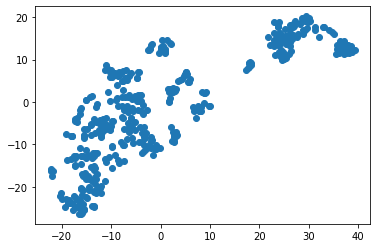

In [22]:
plt.scatter(X_train_tsne[:, 0],X_train_tsne[:, 1])
plt.show()

### Task 1.2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [25]:
labels_train = kmeans.fit_predict(X_train_scaled)

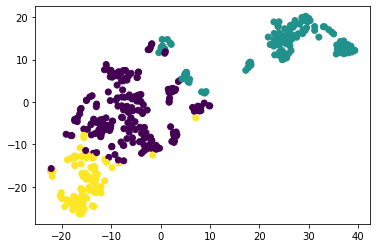

In [26]:
plt.scatter(X_train_tsne[:, 0],X_train_tsne[:, 1],c=labels_train)
plt.show()

In [27]:
y_train[labels_train==0].mean()

PRICE    24.958115
dtype: float64

In [28]:
X_train['CRIM'][labels_train==0].mean()

0.42166020942408367

In [29]:
y_train[labels_train==1].mean()

PRICE    16.165354
dtype: float64

In [30]:
X_train['CRIM'][labels_train==1].mean()

10.797028425196853

In [31]:
y_train[labels_train==2].mean()

PRICE    27.788372
dtype: float64

In [32]:
X_train['CRIM'][labels_train==2].mean()

0.07356558139534886

### Task 1.3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [33]:
labels_test = kmeans.predict(X_test_scaled)

In [34]:
y_test[labels_test==0].mean()

PRICE    21.860784
dtype: float64

In [35]:
X_test['CRIM'][labels_test==0].mean()

0.26607882352941176

In [36]:
y_test[labels_test==1].mean()

PRICE    16.437143
dtype: float64

In [37]:
X_test['CRIM'][labels_test==1].mean()

10.165531142857143

In [38]:
y_test[labels_test==2].mean()

PRICE    31.35
dtype: float64

In [39]:
X_test['CRIM'][labels_test==2].mean()

0.062060000000000004

## Дополнительное задание для работы с курсовым проектом

### Task 2.1
Примените модель понижения размерности к вашим данным, визуализируйте их.

In [40]:
df = pd.read_csv('train.csv')
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [41]:
df = df.drop(df[df['HouseYear'] > 2020].index.tolist())
X = df.drop(['Price', 'Id', 'DistrictId'], axis = 1)
y = df['Price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [43]:
X_train_LifeSquare_median = X_train['LifeSquare'].median()
X_train_Healthcare_1_median = X_train['Healthcare_1'].median()

In [44]:
X['LifeSquare'] = X['LifeSquare'].fillna(X_train_LifeSquare_median)
X['Healthcare_1'] = X['Healthcare_1'].fillna(X_train_Healthcare_1_median)

In [45]:
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          9998 non-null   float64
 1   Square         9998 non-null   float64
 2   LifeSquare     9998 non-null   float64
 3   KitchenSquare  9998 non-null   float64
 4   Floor          9998 non-null   int64  
 5   HouseFloor     9998 non-null   float64
 6   HouseYear      9998 non-null   int64  
 7   Ecology_1      9998 non-null   float64
 8   Social_1       9998 non-null   int64  
 9   Social_2       9998 non-null   int64  
 10  Social_3       9998 non-null   int64  
 11  Healthcare_1   9998 non-null   float64
 12  Helthcare_2    9998 non-null   int64  
 13  Shops_1        9998 non-null   int64  
 14  Ecology_2_A    9998 non-null   uint8  
 15  Ecology_2_B    9998 non-null   uint8  
 16  Ecology_3_A    9998 non-null   uint8  
 17  Ecology_3_B    9998 non-null   uint8  
 18  Shops_2_

In [46]:
scaler_sc = StandardScaler(with_mean = False)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
X_train_scaled = X_train.copy()
X_train_scaled[X.columns[:14]] = scaler_sc.fit_transform(X_train[X.columns[:14]])
X_test_scaled = X_test.copy()
X_test_scaled[X.columns[:14]] = scaler_sc.transform(X_test[X.columns[:14]])

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(random_state = 100)

In [51]:
pca.fit(X_train_scaled)

PCA(random_state=100)

In [52]:
pca.explained_variance_ratio_

array([2.09516023e-01, 1.33570466e-01, 1.12725612e-01, 9.51285504e-02,
       7.14091240e-02, 6.95584663e-02, 6.70301007e-02, 6.20300123e-02,
       4.95561221e-02, 3.94433186e-02, 3.76645514e-02, 2.26161440e-02,
       1.24793031e-02, 9.95317940e-03, 3.55906978e-03, 2.54413101e-03,
       1.21582579e-03, 6.03797563e-34, 1.07724897e-34, 3.41402121e-35])

In [53]:
np.sum(pca.explained_variance_ratio_[:14])

0.9926809734106589

In [54]:
pca_mc = PCA(n_components = 14, random_state = 100)

In [55]:
X_train_mc = pca.fit_transform(X_train_scaled)

In [56]:
X_test_mc = pca.transform(X_test_scaled)

### Для визуализации

In [57]:
tsne_vs = TSNE(n_components=2, learning_rate=250, random_state=42)

In [58]:
X_train_tsne_vs = tsne_vs.fit_transform(X_train_scaled)

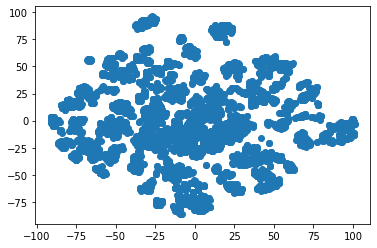

In [59]:
plt.scatter(X_train_tsne_vs[:,0], X_train_tsne_vs[:,1])
plt.show()

### Task 2.2
Сделайте кластеризацию на тренировочном наборе данных. Добавьте новый признак в тренировочный и валидационный наборы данных - метка кластера. Сравнить качество работы модели без метки кластера и с ней по валидационной выборке.

In [60]:
kmeans_vs = KMeans(n_clusters=2, max_iter=250, random_state=42)

In [61]:
labels_train_vs = kmeans_vs.fit_predict(X_train_scaled)

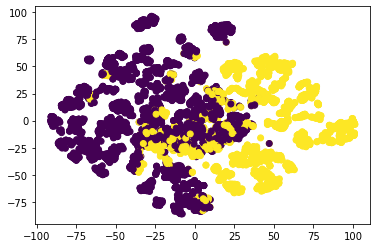

In [62]:
plt.scatter(X_train_tsne_vs[:,0], X_train_tsne_vs[:,1], c = labels_train_vs)
plt.show()

In [63]:
X_train_scaled_vs = X_train_scaled.copy()
X_train_scaled_vs['claster'] = labels_train_vs

In [64]:
labels_test_vs = kmeans_vs.predict(X_test_scaled)

In [65]:
X_test_scaled_vs = X_test_scaled.copy()
X_test_scaled_vs['claster'] = labels_test_vs

In [66]:
from sklearn.metrics import r2_score

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()

In [69]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_test_scaled)

In [71]:
r2_score(y_test, y_pred)

0.4745619591860817

In [72]:
lr_vs = LinearRegression()

In [73]:
lr_vs.fit(X_train_scaled_vs, y_train)

LinearRegression()

In [74]:
y_pred_vs = lr_vs.predict(X_test_scaled_vs)

In [75]:
r2_score(y_test, y_pred_vs)

0.4781970438911046

Качество работы модели с меткой кластера лучше